In [67]:
import numpy as np
import time
import os
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, Reshape, UpSampling1D, UpSampling2D, UpSampling3D
from keras.layers import Conv2D, Conv1D, MaxPooling2D, BatchNormalization
from keras.callbacks import TensorBoard
from keras.utils import np_utils
from keras.datasets import cifar10
from keras import backend
from keras import models
from keras.models import model_from_json
from PIL import Image
from skimage.transform import resize

##Modify Parameters Here
bands=4
hr_img_size=(450,450)
inpt_lr_img_size=(135,135)
sptlvarmeasure=32

In [143]:
def array_from_tif_dir(tifdir,res):
    finaldim=(len(os.listdir(os.getcwd() + '/tifs/' + tifdir)),res,res,4)
    finalset=np.zeros(finaldim)
    imgcounter=0
    for imagename in os.listdir(os.getcwd() + '/tifs/' + tifdir):
        image = misc.imread(os.getcwd() + '/tifs/' + tifdir + imagename)
        finalset[imgcounter,:,:,:]= image
        imgcounter+=1
    return(finalset)
y_train=array_from_tif_dir('HR/',hr_img_size[0])
y_test=array_from_tif_dir('HRV/',hr_img_size[0])
X_train=array_from_tif_dir('LR/',inpt_lr_img_size[0])
X_test=array_from_tif_dir('LRV/',inpt_lr_img_size[0])
        
        

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [144]:
#y_train=np.swapaxes(y_train,1,-1)
#y_test=np.swapaxes(y_test,1,-1)
#X_train=np.swapaxes(X_train,1,-1)
#X_test=np.swapaxes(X_test,1,-1)
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

# 5. Preprocess input data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')[90:100] 
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')[90:100]
X_train /= 255
X_test /= 255
y_train /= 255
y_test /= 255


(153, 135, 135, 4)
(925, 135, 135, 4)
(925, 450, 450, 4)
(153, 450, 450, 4)


In [159]:
input_layer = Input(shape=X_train.shape[1:])
x = Conv2D(16, kernel_size=(3,3), strides=(2,2),activation='relu')(input_layer)
x = Conv2D(16, kernel_size=(3,3), strides=(2,2),activation='relu')(x)
print(x._keras_shape)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, kernel_size=(3,3), strides=(2,2),activation='relu')(x)
print(x._keras_shape)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, kernel_size=(3,3), strides=(1,1),activation='relu')(x)
print(x._keras_shape)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, kernel_size=(3,3), strides=(1,1),activation='relu')(x)
x = Conv2D(16, kernel_size=(3,3), strides=(1,1),activation='relu')(x)
print(x._keras_shape)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, kernel_size=(3,3), strides=(1,1),activation='relu')(x)
x = Conv2D(16, kernel_size=(3,3), strides=(1,1),activation='relu')(x)
print(x._keras_shape)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, kernel_size=(9,9), strides=(1,1),activation='relu')(x)
x = Conv2D(16, kernel_size=(9,9), strides=(1,1),activation='relu')(x)
x = Conv2D(4, kernel_size=(7,7), strides=(1,1),activation='relu')(x)
output_layer = Reshape((450*450,4))(x)
print(x._keras_shape)
model = models.Model(inputs=input_layer, outputs=output_layer)
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['accuracy'])

(None, 33, 33, 16)
(None, 65, 65, 16)
(None, 128, 128, 16)
(None, 252, 252, 16)
(None, 500, 500, 16)


ValueError: total size of new array must be unchanged

In [124]:
model.summary()
model.fit(X_train, y_train, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 135, 135, 4)       0         
_________________________________________________________________
conv2d_445 (Conv2D)          (None, 67, 67, 16)        592       
_________________________________________________________________
conv2d_446 (Conv2D)          (None, 33, 33, 16)        2320      
_________________________________________________________________
up_sampling2d_175 (UpSamplin (None, 66, 66, 16)        0         
_________________________________________________________________
conv2d_447 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
up_sampling2d_176 (UpSamplin (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_448 (Conv2D)          (None, 62, 62, 16)        2320      
__________

KeyboardInterrupt: 

In [32]:
# 7. Define model architecture
model = Sequential()
ilis=inpt_lr_img_size[0]
ihis=hr_img_size[0]
ratio=float(ilis)/float(ihis)
collapsesize=int((ratio**3)*ihis)
solved=int((ilis-collapsesize+10)/8)
bands = 2 
model.add(Conv2D(filters=bands*3, kernel_size=(int(solved), int(solved)), \
                 activation='relu', input_shape=(ilis,ilis,4)))
model.add(Conv2D(filters=bands*3, kernel_size=(int(solved), int(solved)), \
                 activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=bands*5, kernel_size=(int(solved), int(solved)), \
                 activation='relu'))
model.add(Conv2D(filters=bands*5, kernel_size=(int(solved), int(solved)), \
                 activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=bands*7, kernel_size=(int(solved), int(solved)), \
                 activation='relu'))
model.add(Conv2D(filters=bands*7, kernel_size=(int(solved), int(solved)), \
                 activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=bands*12, kernel_size=(int(solved/2), int(solved/2)), \
                 activation='relu'))
model.add(Conv2D(filters=bands*12, kernel_size=(int(solved/2), int(solved/2)), \
                 activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=bands*15, kernel_size=(int(solved/2), int(solved/2)), \
                 activation='relu'))
model.add(Conv2D(filters=bands*15, kernel_size=(int(solved/2), int(solved/2)), \
                 activation='relu'))
currentsize=model.layers[-1].get_output_at(0).get_shape().as_list()[-2]
reduceneed=currentsize-collapsesize
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=bands*15, kernel_size=(reduceneed+1, reduceneed+1), \
                 activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(UpSampling2D((int(1/ratio*3),int(1/ratio*3))))
print(int(1/ratio*3))
model.add(Conv2D(filters=bands*15, kernel_size=(int(solved/2), int(solved/2)), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=bands*15, kernel_size=(int(solved/2), int(solved/2)), activation='relu'))
model.add(BatchNormalization())


model.add(UpSampling2D((int(1/ratio),int(1/ratio))))
print(int(1/ratio*2))
model.add(Conv2D(filters=bands*12, kernel_size=(int(solved/2), int(solved/2)), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=bands*12, kernel_size=(int(solved/2), int(solved/2)), activation='relu'))
model.add(BatchNormalization())

model.add(UpSampling2D((2,2)))
model.add(Conv2D(filters=bands*5, kernel_size=(int(solved/2), int(solved/2)), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=bands*5, kernel_size=(int(solved/2), int(solved/2)), activation='relu'))
currentsize=model.layers[-1].get_output_at(0).get_shape().as_list()[-2]
bandcollapse=model.layers[-1].get_output_at(0).get_shape().as_list()[-1]
reduceneed=currentsize-hr_img_size[0]
model.add(BatchNormalization())

model.add(Conv2D(filters=4, kernel_size=(reduceneed+1, reduceneed+1), activation='relu'))
model.add(Reshape((450*450,4)))
print(model.summary())

# 8. Compile model
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['accuracy'])

10
6
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_183 (Conv2D)          (None, 120, 120, 6)       6150      
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 105, 105, 6)       9222      
_________________________________________________________________
batch_normalization_118 (Bat (None, 105, 105, 6)       24        
_________________________________________________________________
dropout_55 (Dropout)         (None, 105, 105, 6)       0         
_________________________________________________________________
conv2d_185 (Conv2D)          (None, 90, 90, 10)        15370     
_________________________________________________________________
conv2d_186 (Conv2D)          (None, 75, 75, 10)        25610     
_________________________________________________________________
batch_normalization_119 (Bat (None, 75, 75, 10)        40        
_____

In [33]:
print(X_train.shape)
y_train = np.reshape(y_train,((925, 450*450, 4)))
model.fit(X_train, y_train, 
          batch_size=2, epochs=1, verbose=1)

(925, 135, 135, 4)
Epoch 1/1
 72/925 [=>............................] - ETA: 1:06:56 - loss: 47.0354 - acc: 0.2320

KeyboardInterrupt: 

In [147]:
np.shape(y_test)

(10, 450, 450, 4)

In [148]:
y_test = np.reshape(y_test, (10,450*450,4))
score = model.evaluate(X_test, y_test, verbose=1)
class_scores= model.predict(X_test)
print(score)

10/10 [==============================] - 0s 23ms/step
[0.035596355795860291, 0.92370766401290894]


In [149]:
class_scores=np.reshape(class_scores, (10,450,450,4))

In [150]:
np.shape(class_scores)

(10, 450, 450, 4)

In [151]:
np.shape(y_test[0])


(202500, 4)

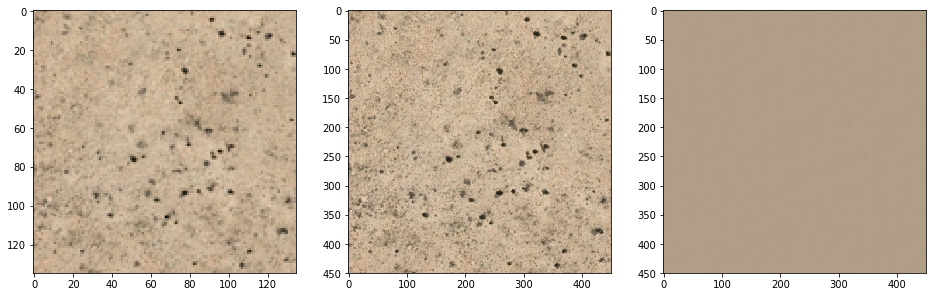

In [158]:
f, ax = plt.subplots(1,3,figsize=(16,16))
i=9
ax[0].imshow(X_test[i][:,:,:3])
ax[1].imshow(np.reshape(y_test[i],(450,450,4))[:,:,:3])
ax[2].imshow(class_scores[i][:,:,0:3])
#plt.colorbar()
plt.show()

In [89]:
import matplotlib.pyplot as plt
classes=[]
for image in class_scores:
    thisclass=image
    classes.append(thisclass)
f, ax = plt.subplots(10,3, figsize=(20, 16))
axind0=0
axind1=0
imagecounter=0
for image in X_test:
    axind0=imagecounter
    emptyximage=np.zeros((10,10,3))
    emptyyimage=np.zeros((32,32,3))
    emptytargetimage=np.zeros((32,32,3))
    for band in range(1,4):
        newximage=np.abs(image[band-1:band,0:10,0:10])
        newtargetimage=y_test[imagecounter][band-1:band,0:32,0:32]
        newyimage=np.abs(classes[imagecounter][band-1:band,0:32,0:32])
        emptyximage[:,:,band-1:band]=newximage.reshape((10,10,1))*(1/np.max(newximage))
        emptyyimage[:,:,band-1:band]=newyimage.reshape((32,32,1))*(1/np.max(newyimage))
        emptytargetimage[:,:,band-1:band]=newtargetimage.reshape((32,32,1))*(1/np.max(newtargetimage))
    imagecounter+=1
    ax[axind0,0].imshow(emptyximage)
    ax[axind0,1].imshow(emptyyimage)
    ax[axind0,2].imshow(emptytargetimage)
    
    
    

IndexError: too many indices for array